In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# importing data
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# samples from data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# overview of the dat
print('Shape of training data:', train.shape)
print('Columns are:\n\t', train.columns, sep='')

Shape of training data: (1460, 81)
Columns are:
	Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print(train.dtypes.value_counts())

object     43
int64      35
float64     3
dtype: int64


- Numeric data: 38 columns
- Non-numeric data: 43 columns

# Numeric data analysis

In [6]:
# numeric columns
num_cols = train.columns[train.dtypes != 'object']
print(num_cols)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


## Correlations

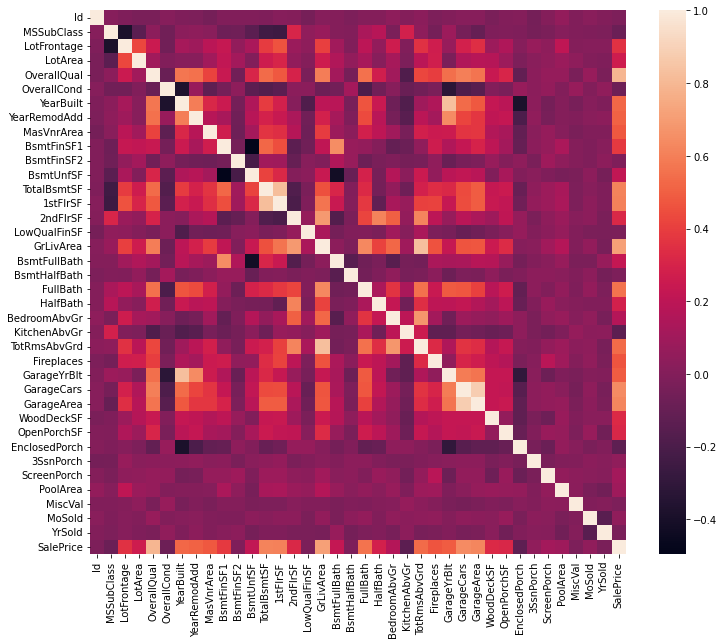

In [7]:
corr_mat = train[num_cols].corr()
plt.subplots(figsize=(12, 10))
sns.heatmap(corr_mat);

### <font color='darkcyan'>Here we see thet have some highly correlated variables</font>

In [8]:
corr_mat.SalePrice.describe() # highest -ve corr: -0.135 (which is low correlation)

count    38.000000
mean      0.293053
std       0.291845
min      -0.135907
25%       0.002612
50%       0.299982
75%       0.518948
max       1.000000
Name: SalePrice, dtype: float64

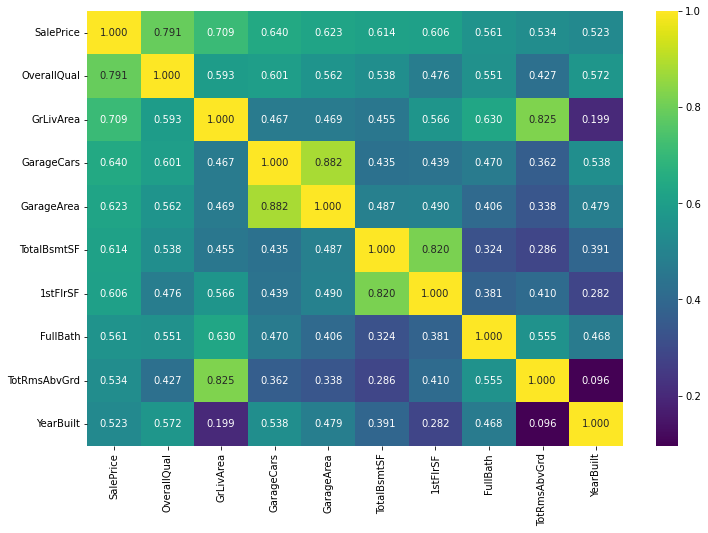

In [9]:
corr_h_cols = corr_mat.nlargest(10, 'SalePrice').index # highest 10 correlated columns with SalePrice
cm = np.corrcoef(train[corr_h_cols].values.T)
plt.subplots(figsize=(12, 8))
sns.heatmap(cm, cmap='viridis', annot=True, fmt='0.3f', xticklabels=corr_h_cols.values, yticklabels=corr_h_cols.values);

# What we get
- `TotRmAbvGrd` (Total rooms above grade (does not include bathrooms)) ~ `GrLivArea` (Above grade (ground) living area square feet)
> having more rooms (in general cases) is relevant for higher spaces, **so we will keep `GrLivArea` since it have higher corr with `SalePrice`**
- `GarageArea` ~ `GarageCars`
> Logic! the more area in your garage, the more it can fit in. **`GarageCars` is the winner**
- `TotalBsmtSF` (Total square feet of basement area) ~ `1stFlrSF` (First Floor square feet)
> Most of apartments have one floor that's why they're highly correlated. **`TotalBsmtSF` wins**

In [10]:
# Numeric feature selection
num_cols_h = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']

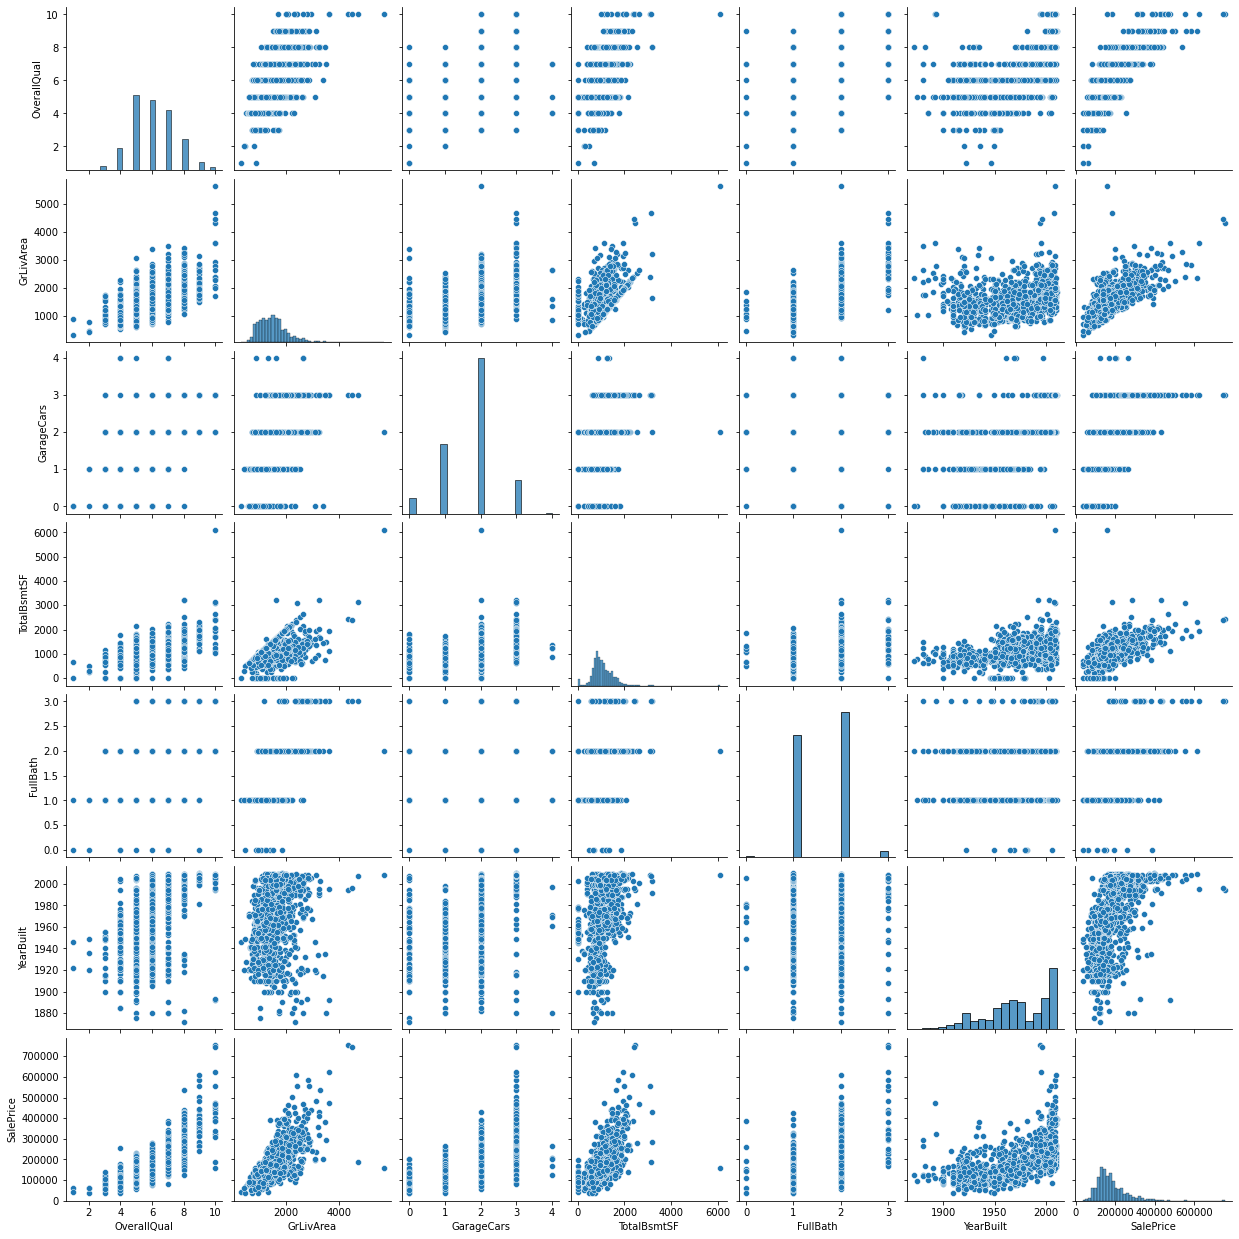

In [11]:
sns.pairplot(train[num_cols_h], height=2.5);

# What we see (below the diagonal)
1) See the dots drawing a linear line between `TotalBsmtSF` and `GrLivArea` which is logical that in most of the apartements the basement is almost equal to the above ground living area (unless you're buying a bunker)

2) In the upper part of of the `YearBuilt` ~ `SalePrice` plot we see the prices are rising exponentially than before, now houses can cost a fortune because of the luxerious options can be provided now

# <font color='forestgreen'>Summary for Numeric Analaysis</font>
### 1) We selected the highest 10 correlated features with the target variable (Where the correlations ranges from 0.523 ~ 0.791).
### 2) Some of the selected features have been removed due to having very high correlation with another features (hence giving the same information twice!).
### 3) Total number of numerical features is `6 columns`.

# Missing information

In [12]:
total = train.isnull().sum().sort_values(ascending=False)
percent = total / train.shape[0]
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


## What we get

1) Columns with extreme high percentage `>15%` of missing values will be deleted as a whole.

2) `GarageX` features have the same number of missing data. Regardless, most of the garage information is expressed by `GarageCars` which is considered, so removing these features might not affect our data this much, same to `BsmtX` features.

3) Regarding `MasVnrArea` and `MasVnrType`, we can consider that these variables are not essential. Furthermore, they have a strong correlation with `YearBuilt` and `OverallQual` which are already considered. Thus, we will not lose information if we delete `MasVnrArea` and `MasVnrType`.

4) `Electrical` have only 1 missing data so we will remove this observation and keep the variable.

In [13]:
train_c = train.copy()

train_c = train_c.drop((missing_data[missing_data['Total'] > 1]).index, 1)
train_c = train_c.drop(train_c.loc[train_c['Electrical'].isnull()].index)
train_c.isnull().sum().max() # checking that there's no missing data missing

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


0

# Categorical Data Analysis

In [14]:
# categorical columns
cat_cols = train_c.columns[train_c.dtypes == 'object']
print(cat_cols)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


### Getting MI Scores

In [15]:
from sklearn.feature_selection import mutual_info_regression

def calc_mi_scores(features, target):
    """Calculating the MI (Mutual Information) scores for categorical features"""
    features = features.copy()
    for colname in features.select_dtypes('object'):
        features[colname], _ = features[colname].factorize()    # convert string values to corresponding numerical values
    
    discrete_features = [pd.api.types.is_integer_dtype(i) for i in features.dtypes]
    mi_scores = mutual_info_regression(features, target, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=features.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, labels=ticks)
    plt.title('Mutual Information Score')

In [16]:
X = train_c.copy()
X.pop('Id')                 # remove the Id column before calculating mi_scores
y = X.pop('SalePrice')

mi_scores = calc_mi_scores(X, y)

In [17]:
print(mi_scores.head(20))

OverallQual     0.569699
Neighborhood    0.528950
GarageArea      0.494550
GrLivArea       0.431268
YearBuilt       0.410317
TotalBsmtSF     0.396863
LotArea         0.392986
GarageCars      0.365374
ExterQual       0.326329
KitchenQual     0.318875
1stFlrSF        0.285012
MSSubClass      0.283417
YearRemodAdd    0.278838
FullBath        0.269869
TotRmsAbvGrd    0.213132
Foundation      0.198668
OpenPorchSF     0.191534
HeatingQC       0.170629
Fireplaces      0.166899
Exterior2nd     0.163224
Name: MI Scores, dtype: float64


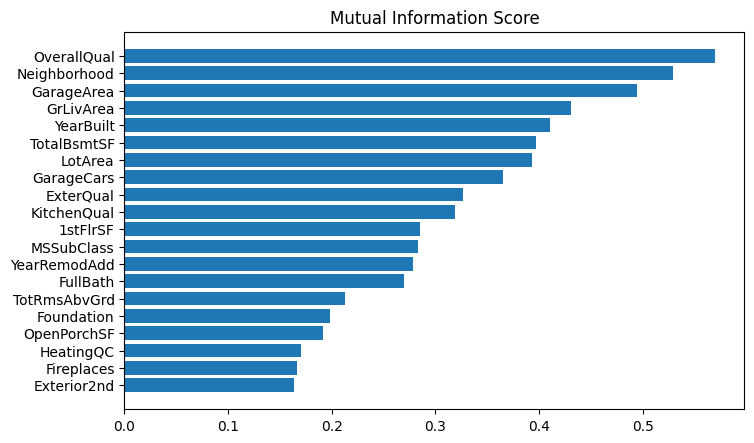

In [18]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

### What we get
In the previous plot we see 20 features having the highest mutual information with the target, comparing to real life scenarios:

1. Quality of everything (overall, kitchen, exter) are very important.
2. Neighborhood (location) is also highly affecting the price of the apartment.
3. Sizes (Area, sf) are highly related, ..etc.

Also the highest relevant categorical features are `Neighborhood`, `ExterQual`, `KitchenQual`, `MSSubClass`, let's see these in action

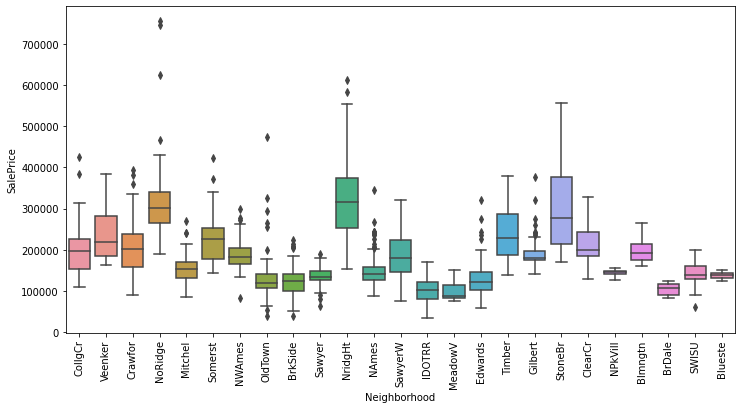

In [19]:
# Neighborhood
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x=train_c['Neighborhood'], y=train_c.SalePrice, data=train_c)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Some Neighborhoods are quite expensive than others (may be they're have a nice view, or far from noise or pollution, more private, ..etc.). Looks like the most expensive neighboorhod is the NridgHt (Northridge Heights). Seeing pictures on Google it's quite lovely!

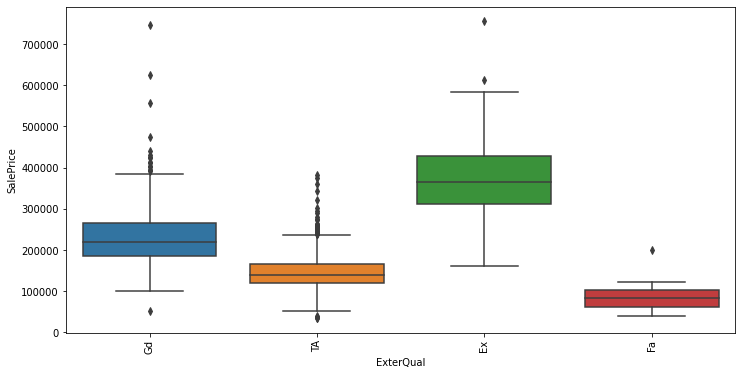

In [20]:
# ExterQual
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x=train_c['ExterQual'], y=train_c.SalePrice, data=train_c)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### What we get

As expected the better the quality the higher the apartment price.
1. Apartments with **Excellent** `ExterQual` mean price = 350k
2. Apartments with **Good** `ExterQual` mean price = 220k
3. Apartments with **Typical/avg** `ExterQual` mean price = 160k
4. Apartments with **Fair** `ExterQual` mean price = 80k

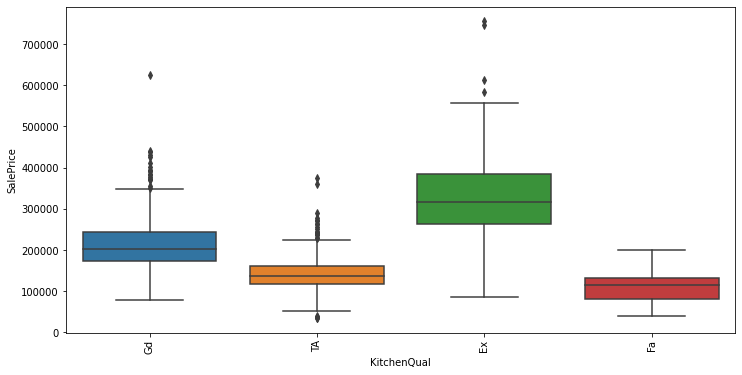

In [21]:
# KitchenQual
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x=train_c['KitchenQual'], y=train_c.SalePrice, data=train_c)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

### What we get

As with `ExterQual`
1. Apartments with **Excellent** `KitchenQual` mean price = 320k
2. Apartments with **Good** `KitchenQual` mean price = 205k
3. Apartments with **Typical/avg** `KitchenQual` mean price = 140k
4. Apartments with **Fair** `KitchenQual` mean price = 125k

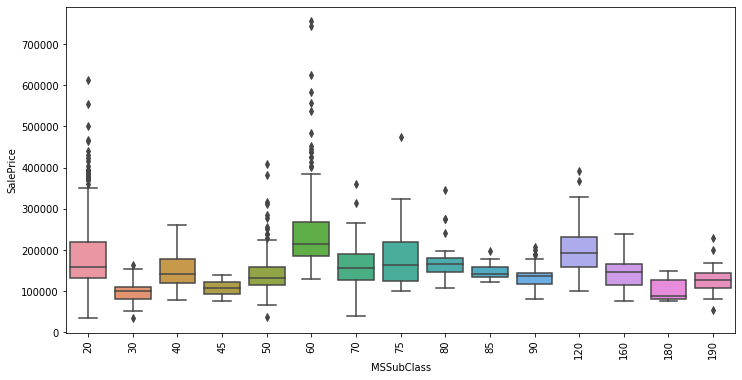

In [22]:
# MSSubClass
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x=train_c['MSSubClass'], y=train_c.SalePrice, data=train_c)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Looks like a **light** sea wave, type of dweeling seems to have only a slight effect on the price as opposed to Neighborhood. Looks like it's better to not be considered.

# Feature Selection

Using the highest correlated features in the numeric features analysis, along with the features with high MI score in selecting our most relevant features.

In [23]:
# Categorical feature selection
cat_cols_h = ['Neighborhood', 'ExterQual', 'KitchenQual']
cols_final = cat_cols_h + num_cols_h
train_f = train_c[cols_final].copy()
train_f.head(2)

,Neighborhood,ExterQual,KitchenQual,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
0,CollgCr,Gd,Gd,7,1710,2,856,2,2003,208500
1,Veenker,TA,TA,6,1262,2,1262,2,1976,181500


### Getting Dummies

In [24]:
train_f = pd.get_dummies(train_f, drop_first=True)
train_f.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,7,1710,2,856,2,2003,208500,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,6,1262,2,1262,2,1976,181500,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,7,1786,2,920,2,2001,223500,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,7,1717,3,756,1,1915,140000,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,8,2198,3,1145,2,2000,250000,0,0,0,...,0,0,0,0,0,1,0,0,1,0


# Outliers Removal

Number of outliers found: 27


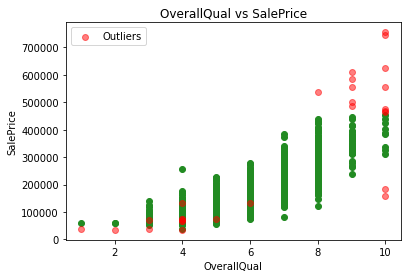

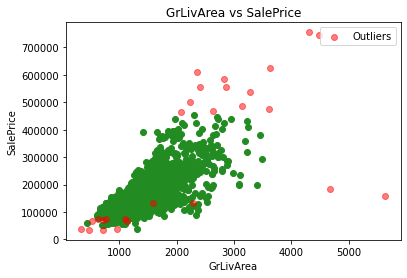

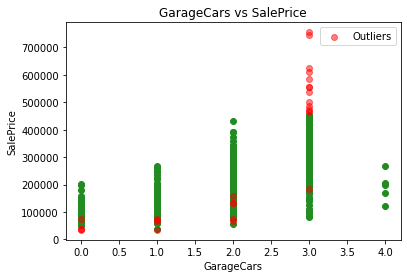

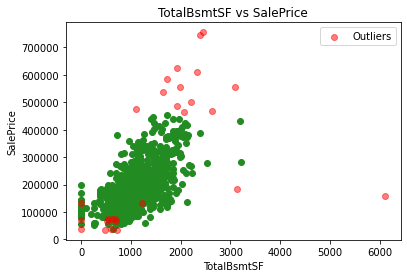

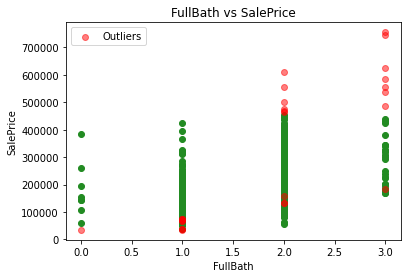

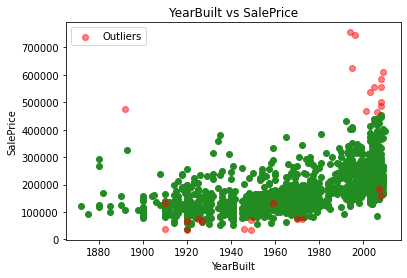

Observations before removing Outliers: (1459, 37)
Observations after removing Outliers: (1432, 37)


In [25]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
good = lof.fit_predict(train_f) == 1
print("Number of outliers found:", (~good).sum())

# Plotting outliers
for col in num_cols_h[:-1]:      # avoid getting SalePrice vs SalePrice
    plt.scatter(train_f[col][good], train_f.SalePrice[good], color='forestgreen')
    plt.scatter(train_f[col][~good], train_f.SalePrice[~good], color='red', alpha=0.5, label='Outliers')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title('{} vs SalePrice'.format(col))
    plt.legend()
    plt.show();
    
# Cleaned data
print("Observations before removing Outliers:", train_f.shape)
train_f = train_f[good]
print("Observations after removing Outliers:", train_f.shape)

## Normalizing data

Skewness: 1.16


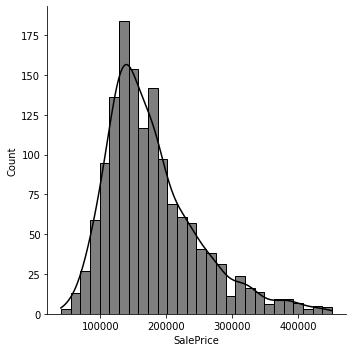

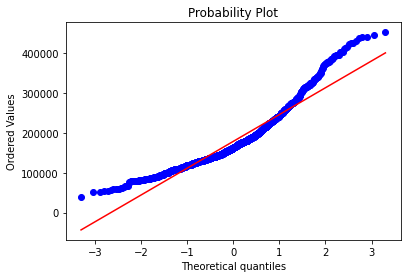

In [26]:
# Target (SalePrice)
sns.displot(train_f.SalePrice, kde=True, color='black')
plt.figure()
res = st.probplot(train_f.SalePrice, plot=plt, dist='norm')
print('Skewness: {:.2f}'.format(train_f.SalePrice.skew()))

## What we get
1. Peakedness
2. Positive Skewness
3. Not following the diagonal line

### Need to be normalized

In [27]:
# transforming
train_f.SalePrice = np.log(train_f.SalePrice)
print("After transformation: {:.3f}".format(train_f.SalePrice.skew()))

After transformation: 0.084


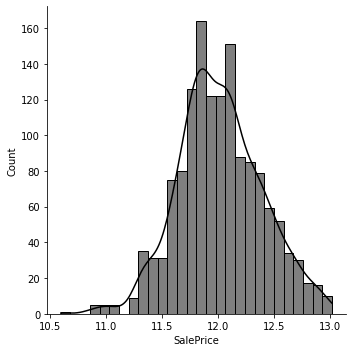

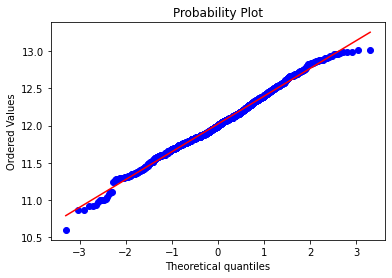

In [28]:
# after transformation
sns.displot(train_f.SalePrice, kde=True, color='black')
plt.figure()
res = st.probplot(train_f.SalePrice, plot=plt, dist='norm')

## Feature Scaling

In [29]:
X = train_f.copy()
y = X.pop('SalePrice')

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[num_cols_h[:-1]] = scaler.fit_transform(X[num_cols_h[:-1]])

# Model Building

### Easy mode

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# splitting data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [31]:
# Linear Regression approach
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)
print("Mean Squared Error: {:.2f}".format(mean_squared_error(np.exp(y_val), np.exp(y_pred), squared=False)))

Mean Squared Error: 27185.73


In [32]:
# Support Vector Regression approach
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_val)
print("Mean Squared Error: {:.2f}".format(mean_squared_error(np.exp(y_val), np.exp(y_pred), squared=False)))

Mean Squared Error: 27039.83


In [33]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_val)
print("Mean Squared Error: {:.2f}".format(mean_squared_error(np.exp(y_val), np.exp(y_pred), squared=False)))

Mean Squared Error: 30993.85


### Applying CV

In [34]:
from sklearn.model_selection import cross_val_score
accuracies_lr = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10)
accuracies_svr = cross_val_score(estimator=svr, X=X_train, y=y_train, cv=10)
accuracies_xgb = cross_val_score(estimator=xgb_reg, X=X_train, y=y_train, cv=10)

print("""
Linear Regression: acc={:.2f}%, std={:.2f}%
SupVec Regression: acc={:.2f}%, std={:.2f}%
XGBoostRegression: acc={:.2f}%, std={:.2f}%""".format(accuracies_lr.mean()*100, accuracies_lr.std()*100,
                                                      accuracies_svr.mean()*100, accuracies_svr.std()*100,
                                                      accuracies_xgb.mean()*100, accuracies_xgb.std()*100))


Linear Regression: acc=86.94%, std=1.97%
SupVec Regression: acc=86.92%, std=1.95%
XGBoostRegression: acc=83.20%, std=2.04%


### Applying GridSearch

In [35]:
SVR().get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [36]:
from sklearn.model_selection import GridSearchCV

svc_params = [{'C' : [0.2, 0.5, 1, 2, 5],
               'kernel': ['linear', 'rbf', 'poly'],
               'degree' : [3, 4, 5],
               'gamma': ['scale', 'auto']}]

grid_search = GridSearchCV(estimator=svr, param_grid=svc_params, cv=10, n_jobs=-1)
best_svr = grid_search.fit(X_train, y_train)

# Getting attributes from GridSearch
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print("Best Accuracy: {:.2f}%".format(best_accuracy * 100))
print("Best Parameters:", best_params)

Best Accuracy: 86.93%
Best Parameters: {'C': 1, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}


In [37]:
svr_tuned = best_svr.best_estimator_.fit(X_train, y_train)
svr_tuned.predict(X_val)

y_pred = svr_tuned.predict(X_val)
print("Mean Squared Error: {:.2f}".format(mean_squared_error(np.exp(y_val), np.exp(y_pred), squared=False)))

Mean Squared Error: 26948.71


### Ensemble modeling

In [38]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor([('lr', lr), ('svr', svr), ('xgb', xgb_reg)])
voting_tun = VotingRegressor([('lr', lr), ('svr', svr_tuned), ('xgb', xgb_reg)])

voting_reg.fit(X_train, y_train)
voting_tun.fit(X_train, y_train)

y_pred = voting_reg.predict(X_val)
print("Mean Squared Error: {:.2f}".format(mean_squared_error(np.exp(y_val), np.exp(y_pred), squared=False)))

y_pred = voting_tun.predict(X_val)
print("Mean Squared Error (tuned): {:.2f}".format(mean_squared_error(np.exp(y_val), np.exp(y_pred), squared=False)))

Mean Squared Error: 27035.53
Mean Squared Error (tuned): 27016.53


# Test data preparation

In [39]:
import math

test_f = test.copy()
test_f = test_f[cols_final[:-1]]                                           # feature selection
test_f = pd.get_dummies(test_f, drop_first=True)                           # getting dummies
test_f[num_cols_h[:-1]] = scaler.transform(test_f[num_cols_h[:-1]])        # feature scaling
# X.shape[1] == test_f.shape[1]               # dim check

# check for missing
test_f['GarageCars'].fillna(math.ceil(test_f['GarageCars'].mean()), inplace=True)
test_f['TotalBsmtSF'].fillna(test_f['TotalBsmtSF'].median(), inplace=True)
# test_f.isnull().sum().sum() == 0            # missing check

# Getting results from best 3 models

In [40]:
# svr model (untuned)
predictions_svr = np.exp(svr.predict(test_f))        # exp to reverse log transform
predictions_svr_tuned = np.exp(svr_tuned.predict(test_f))        # exp to reverse log transform
predictions_vot = np.exp(voting_reg.predict(test_f))

output_svr = pd.DataFrame({'Id' : test.Id, 'SalePrice': predictions_svr})
output_svr_tuned = pd.DataFrame({'Id' : test.Id, 'SalePrice': predictions_svr_tuned})
output_vot = pd.DataFrame({'Id' : test.Id, 'SalePrice': predictions_vot})

output_svr.to_csv('SVR_Predictions.csv', index=False)
output_svr_tuned.to_csv('SVR_Tuned_Predictions.csv', index=False)
output_vot.to_csv('VotingReg_Prediction.csv', index=False)
print("Successfully Submitted")

Successfully Submitted
